In [2]:
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, confusion_matrix,precision_recall_curve, roc_curve, auc, fbeta_score,roc_auc_score
from our_model import one_hot_model,embedding_model,our_model
import pandas as pd
from tensorflow.keras.utils import to_categorical as labelEncoding 
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

# import umap
# import umap.plot
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
data_embed = np.load('one_hot_data/X_one.npz')
data_onehot = np.load('one_hot_data/BPF.npz')
data_word = np.load('data/Process_data/X_all4.npz')
X1_e = data_embed['x_train']
X2_e = data_embed['x_test']
X1_o = data_onehot['X_train']
X2_o = data_onehot['X_test']
X1_w = data_word['x_train']
X2_w = data_word['x_test']
y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
y1 = labelEncoding(y_1, dtype=int)
y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
y2 = labelEncoding(y_2,dtype=int)

In [4]:
model_o = one_hot_model()
model_o.load_weights("my_model_onehot/our_model_test/firstModel5.tf" )
model_e = embedding_model()
model_e.load_weights('my_model_embeding/our_model_test/firstModel3.tf')
model_w = our_model()
model_w.load_weights('my_model2/our_model_41_test/firstModel4.tf')

In [7]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,'{:.0f}'.format(cm[i, j]),fontsize=15 , horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.show()
    plt.savefig('FIG/FRLfig.png',dpi=600, bbox_inches='tight')

# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,title):
    predictions = model.predict(x_val)
    predictions = predictions.argmax(axis=1)   # 将one-hot转化为label
    truelabel = y_2
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    print(conf_mat)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),title)
    

[[425  60]
 [ 62 423]]


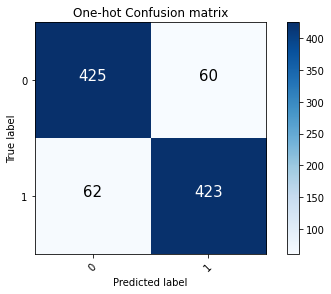

In [8]:
plot_confuse(model_o,X2_o,y2,title='One-hot Confusion matrix')

[[442  43]
 [ 46 439]]


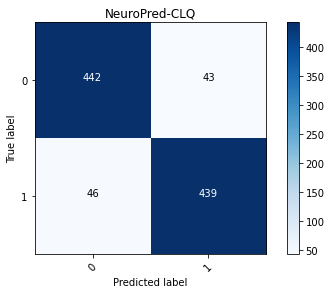

In [11]:
plot_confuse(model_w,X2_w,y2,title='NeuroPred-CLQ')

[[442  43]
 [ 62 423]]


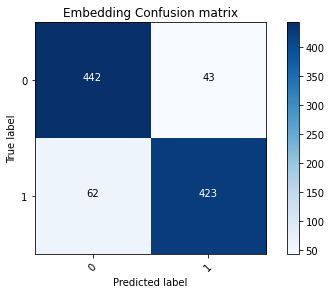

In [9]:
plot_confuse(model_e,X2_e,y2,title='Embedding Confusion matrix')

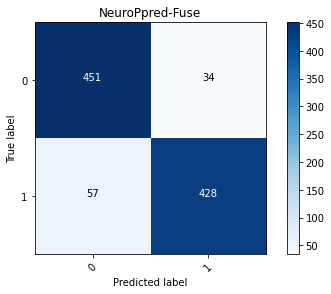

In [18]:
model_fuse = np.array([[451, 34],[57, 428]])
plot_confusion_matrix(model_fuse, range(2),'NeuroPpred-Fuse')

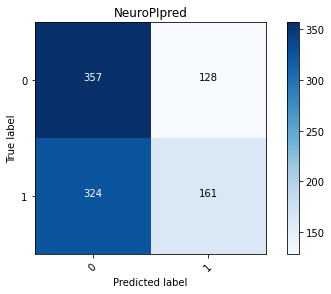

In [3]:
model_fuse = np.array([[357, 128],[324, 161]])
plot_confusion_matrix(model_fuse, range(2),'NeuroPIpred')

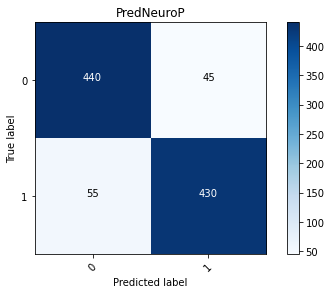

In [5]:
model_fuse = np.array([[440, 45],[55, 430]])
plot_confusion_matrix(model_fuse, range(2),'PredNeuroP')

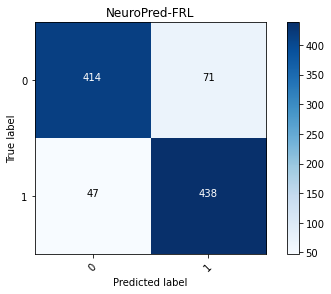

In [7]:
model_fuse = np.array([[414, 71],[47, 438]])
plot_confusion_matrix(model_fuse, range(2),'NeuroPred-FRL')

In [1]:
def multi_models_roc(names, sampling_methods, colors, X_t, y_2, save=True, dpin=600):
        """
        将多个机器模型的roc图输出到一张图上
        
        Args:
            names: list, 多个模型的名称
            sampling_methods: list, 多个模型的实例化对象
            save: 选择是否将结果保存（默认为png格式）
            
        Returns:
            返回图片对象plt
        """
#         sns.set()
        plt.figure(figsize=(8, 8))
        plt.grid(False)

        for (name, method, colorname,X_test) in zip(names, sampling_methods, colors,X_t):
            
#             method.fit(X_train, y_train)
            Yactual = y_2
            Yp = method.predict(X_test)
            v = Yp
            Yp = Yp.argmax(axis=1)
            fpr, tpr, _ = roc_curve(Yactual, v[:,1])
#             y_test_predprob = method.predict_proba(X_test)[:,1]
#             precision, recall, _ = precision_recall_curve(y_test, y_test_predprob)
#             fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
            plt.plot(fpr, tpr, lw=3, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
            plt.plot([-0.01, 1.01], [-0.01, 1.01], '--', lw=3, color = 'grey')
            plt.axis('square')
            plt.xlim([-0.01, 1.01])
            plt.ylim([-0.01, 1.01])
            plt.xlabel('False Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.ylabel('True Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.title('ROC Curve',fontdict={'family' : 'Times New Roman', 'size' : 20})
            plt.legend(loc='lower right',fontsize=10)

        if save:
            plt.savefig('FIG/multi_models_roc_one_SE.png',dpi=400)
            
        return plt

In [2]:
names = ['One-hot','Embedding','Word2vec']
sampling_methods = [model_o,model_e,model_w]
colors = ['steelblue',
#           'orange',
#           'gold',
          'mediumseagreen', 
          'crimson',
#           'mediumpurple'  
         ]
X_t = [X2_o,X2_e,X2_w]

NameError: name 'model_o' is not defined

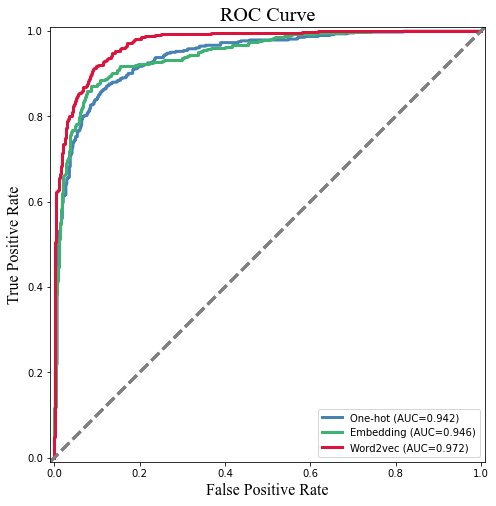

In [105]:
train_roc_graph = multi_models_roc(names, sampling_methods, colors, X_t, y_2, save = True)

In [106]:
def multi_models_PR(names, sampling_methods, colors, X_t, y_2, save=True, dpin=600):
        """
        将多个机器模型的roc图输出到一张图上
        
        Args:
            names: list, 多个模型的名称
            sampling_methods: list, 多个模型的实例化对象
            save: 选择是否将结果保存（默认为png格式）
            
        Returns:
            返回图片对象plt
        """
#         sns.set()
        plt.figure(figsize=(8, 8))
        plt.grid(False)

        for (name, method, colorname,X_test) in zip(names, sampling_methods, colors,X_t):
            
#             method.fit(X_train, y_train)
            Yactual = y_2
            Yp = method.predict(X_test)
            v = Yp
            Yp = Yp.argmax(axis=1)
#             fpr, tpr, _ = roc_curve(Yactual, v[:,1])
#             y_test_predprob = method.predict_proba(X_test)[:,1]
            pre, rec, _ = precision_recall_curve(Yactual, v[:,1])
#             fpr, tpr, thresholds = roc_curve(Yactual, y_test_predprob, pos_label=1)
            
            plt.plot(rec, pre, lw=3, label='{} (AUPR={:.3f})'.format(name, auc(rec,pre)),color = colorname)
            plt.plot([-0.01, 1.01], [-0.01, 1.01], '--', lw=3, color = 'grey')
            plt.axis('square')
            plt.xlim([-0.01, 1.01])
            plt.ylim([-0.01, 1.01])
            plt.xlabel('False Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.ylabel('True Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.title('PR Curve',fontdict={'family' : 'Times New Roman', 'size' : 20})
            plt.legend(loc='lower right',fontsize=10)

        if save:
            plt.savefig('multi_models_PR.png',dpi=600)
            
        return plt

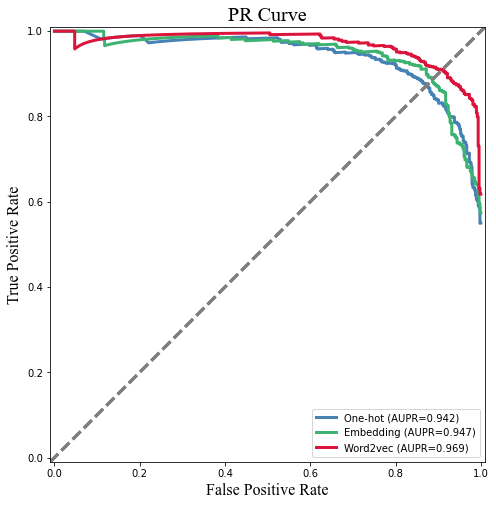

In [107]:
train_PR_graph = multi_models_PR(names, sampling_methods, colors, X_t, y_2, save = True)

In [6]:
data = pd.read_excel('results/整理.xlsx')
y_true = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
y_our = data['ourmodel'].to_numpy()
y_Ipred = data['NeroPIpred'].to_numpy()
y_FUSE = data['FUSE'].to_numpy()
y_FRL = data['FRL'].to_numpy()

In [13]:
def multi_models_roc(names, colors, Y_1, y_2, save=True, dpin=600):
        """
        将多个机器模型的roc图输出到一张图上
        
        Args:
            names: list, 多个模型的名称
            sampling_methods: list, 多个模型的实例化对象
            save: 选择是否将结果保存（默认为png格式）
            
        Returns:
            返回图片对象plt
        """
#         sns.set()
        plt.figure(figsize=(8, 8))
        plt.grid(False)

        for (name, colorname,y_1) in zip(names, colors,Y_1):
            
#             method.fit(X_train, y_train)
            Yactual = y_2
#             Yp = method.predict(X_test)
            v = y_1
#             Yp = Yp.argmax(axis=1)
            fpr, tpr, _ = roc_curve(Yactual, v)
#             y_test_predprob = method.predict_proba(X_test)[:,1]
#             precision, recall, _ = precision_recall_curve(y_test, y_test_predprob)
#             fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
            plt.plot(fpr, tpr, lw=3, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
            plt.plot([-0.01, 1.01], [-0.01, 1.01], '--', lw=3, color = 'grey')
            plt.axis('square')
            plt.xlim([-0.01, 1.01])
            plt.ylim([-0.01, 1.01])
            plt.xlabel('False Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.ylabel('True Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.title('ROC Curve',fontdict={'family' : 'Times New Roman', 'size' : 20})
            plt.legend(loc='lower right',fontsize=10)

        if save:
            plt.savefig('multi_models_roc222.png',dpi=600)
            
        return plt

In [14]:
names = ['NeuroPpred-Fuse','PredNeuroP','NeuroPred-CLQ',]
Y_1 = [y_FUSE,y_Ipred,y_our]
colors = ['steelblue',
#           'orange',
#           'gold',
          'mediumseagreen', 
          'crimson',
#           'mediumpurple'  
         ]

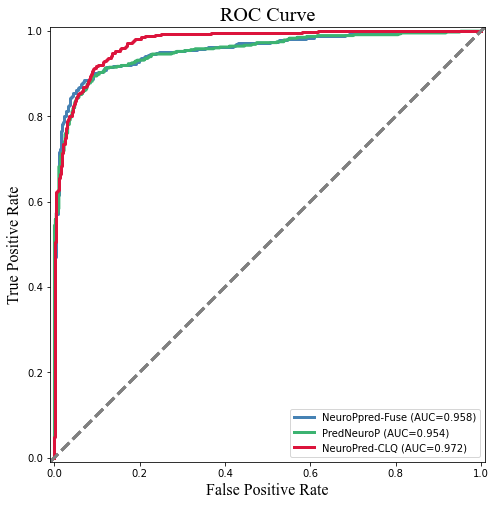

In [15]:
train_roc_graph = multi_models_roc(names,  colors, Y_1, y_true, save = True)

In [18]:
def multi_models_PR(names, colors, Y_1, y_2, save=True, dpin=600):
        """
        将多个机器模型的roc图输出到一张图上
        
        Args:
            names: list, 多个模型的名称
            sampling_methods: list, 多个模型的实例化对象
            save: 选择是否将结果保存（默认为png格式）
            
        Returns:
            返回图片对象plt
        """
#         sns.set()
        plt.figure(figsize=(8, 8))
        plt.grid(False)

        for (name, colorname,y_1) in zip(names, colors,Y_1):
            
#             method.fit(X_train, y_train)
            Yactual = y_2
#             Yp = method.predict(X_test)
            v = y_1
#             Yp = Yp.argmax(axis=1)
#             fpr, tpr, _ = roc_curve(Yactual, v)
            pre, rec, _ = precision_recall_curve(Yactual, v)
#             y_test_predprob = method.predict_proba(X_test)[:,1]
#             precision, recall, _ = precision_recall_curve(y_test, y_test_predprob)
#             fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            plt.plot(rec, pre, lw=3, label='{} (AUPR={:.3f})'.format(name, auc(rec,pre)),color = colorname)
#             plt.plot(fpr, tpr, lw=3, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
            plt.plot([-0.01, 1.01], [-0.01, 1.01], '--', lw=3, color = 'grey')
            plt.axis('square')
            plt.xlim([-0.01, 1.01])
            plt.ylim([-0.01, 1.01])
            plt.xlabel('False Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.ylabel('True Positive Rate',fontdict={'family' : 'Times New Roman', 'size' : 16})
            plt.title('PR Curve',fontdict={'family' : 'Times New Roman', 'size' : 20})
            plt.legend(loc='lower right',fontsize=10)

        if save:
            plt.savefig('multi_models_PR222.png',dpi=600)
            
        return plt

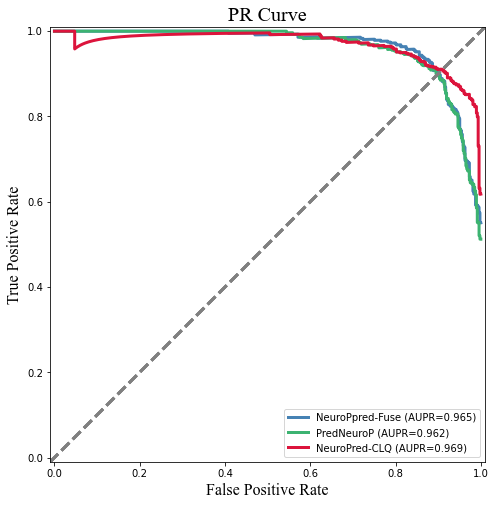

In [19]:
train_PR_graph = multi_models_PR(names,  colors, Y_1, y_true, save = True)

In [117]:
def unBoundLayers(modelIn,layers = []):
    for layer in modelIn.layers:
        if not 'sequential' in layer.name.lower():
            layers.append(layer)
        else:
            unBoundLayers(layer,layers)
    return layers

In [17]:
model_w = our_model()
model_w.load_weights('my_model2/our_model_41_test/firstModel4.tf')

In [118]:
layers = unBoundLayers(model_w)
for i, layer in enumerate(layers):
    print('layer %d: %s' %(i,layer.name))

layer 0: input_7
layer 1: conv1d_18
layer 2: batch_normalization_12
layer 3: conv1d_19
layer 4: batch_normalization_13
layer 5: conv1d_20
layer 6: max_pooling1d_6
layer 7: dropout_12
layer 8: bidirectional_6
layer 9: flatten_6
layer 10: FC3
layer 11: dropout_13
layer 12: FC2
layer 13: FC4
layer 14: Output


In [19]:
newModel_after_pool4 = Sequential()
for layer in layers[:15]:
    newModel_after_pool4.add(layer)
newModel_after_pool4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 95, 128)           57728     
                                                                 
 batch_normalization_12 (Bat  (None, 95, 128)          512       
 chNormalization)                                                
                                                                 
 conv1d_19 (Conv1D)          (None, 93, 128)           49280     
                                                                 
 batch_normalization_13 (Bat  (None, 93, 128)          512       
 chNormalization)                                                
                                                                 
 conv1d_20 (Conv1D)          (None, 91, 256)           98560     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 89, 256)         

In [158]:
predicted_Probability_after_pool = newModel_after_pool2.predict(X2_w)

In [159]:
predicted_Probability_after_pool.shape

(970, 22784)

In [160]:
y_2 = y_2.reshape(970,1)

In [167]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# import umap.umap_ as umap1
tsne = TSNE(n_components=3,)
# X_std = StandardScaler().fit_transform(predicted_Probability_after_pool)
X_tsne = tsne.fit_transform(np.mean(X2_w,axis=2))
# X_tsne = tsne.fit_transform(predicted_Probability_after_pool)
# X_tsne_data = np.hstack((X_tsne, y_2))
# df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1','Dim2', 'Class'])

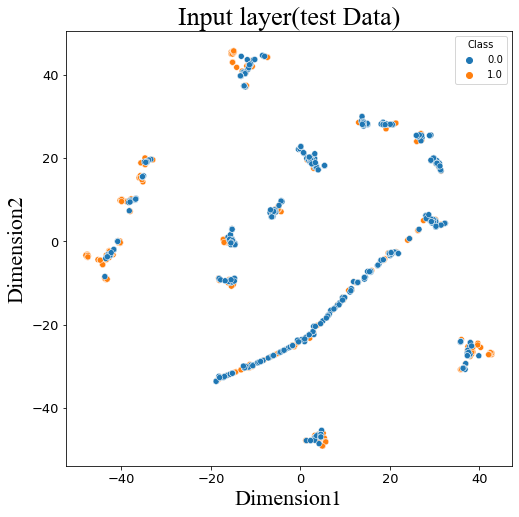

In [78]:
plt.figure(figsize=(8, 8))
plt.grid(False)
sns.scatterplot(data=df_tsne, hue='Class', x='Dim1', y='Dim2')
plt.xlabel('Dimension1',fontdict={'family' : 'Times New Roman', 'size' : 22})
plt.ylabel("Dimension2",fontdict={'family' : 'Times New Roman', 'size' : 22})
plt.title('Input layer(test Data)',fontdict={'family' : 'Times New Roman', 'size' : 26})
plt.tick_params(labelsize=13) 
# plt.show()
plt.savefig('FIG/input.png',dpi=360)

In [79]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\c's'z\AppData\Local\Temp/ipykernel_11148/2243809560.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


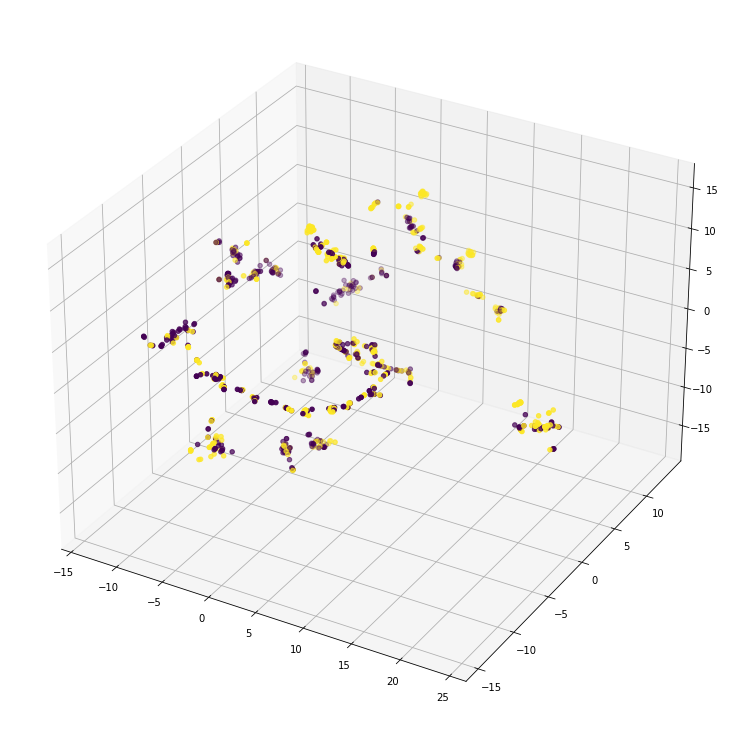

In [168]:
fig = plt.figure(figsize=(10,10))
# fig.grid(False)
# plt.grid(False)
ax = Axes3D(fig)
x = X_tsne[:, 0]
y = X_tsne[:, 1]
z = X_tsne[:, 2]
ax.scatter(x, y, z, c=y_2)
# ax.set_zlabel('Dimension1', fontdict={'family' : 'Times New Roman', 'size' : 22})

# ax.set_ylabel('Dimension2', fontdict={'family' : 'Times New Roman', 'size' : 22})

# ax.set_xlabel('Dimension3', fontdict={'family' : 'Times New Roman', 'size' : 22})
# ax.set_title('FC layer',fontdict={'family' : 'Times New Roman', 'size' : 20})
plt.savefig('FIG/input3D.png',dpi=360)

In [3]:
data = pd.read_excel('results/整理.xlsx')
data

,Unnamed: 0,Id,Sequence,ourmodel,NeroPIpred,FUSE,FRL
0,0,NP00317,AGWSSLKGAW,0.995747,0.9696,0.960549,0.979
1,1,NP00717,DALSPPAAGLGADHSFT,0.947327,0.6052,0.519240,0.880
2,2,NP01482,DQNRNFLRF,0.999131,0.9932,0.984482,0.999
3,3,NP03336,DPYAFGLGKRPADLYEFGL,0.971610,0.9386,0.729304,0.613
4,4,NP02850,SSPCPPVEGPAGRQRPLCASRSRLIPAPRGAVLVQREKDLSTYNWN...,0.994511,0.9734,0.977131,0.968
...,...,...,...,...,...,...,...
965,965,non-NeuroP021909,MPVNNFGFLATLLFVAVPMLFLIGLYIQTNSNKS,0.000041,0.0193,0.029612,0.039
966,966,non-NeuroP015018,TETQSFNFNVFEPEN,0.867910,0.0923,0.039585,0.150
967,967,non-NeuroP010237,IFGAILPLALGALKNLIK,0.000957,0.0127,0.020218,0.101
968,968,non-NeuroP055262,GTQTNAPWGLARLIS,0.000254,0.1272,0.132024,0.161


In [10]:
X_our = data['ourmodel'].to_numpy()
X_Fuse = data['FUSE'].to_numpy()
X_PredNeuroP = data['NeroPIpred'].to_numpy()

In [11]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

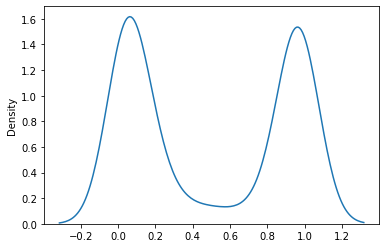

In [8]:
sns.kdeplot(X_Fuse)

<AxesSubplot:ylabel='Density'>

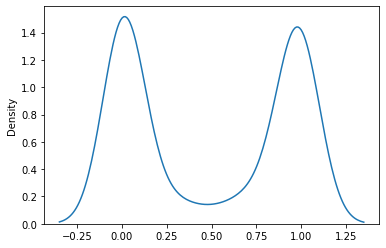

In [9]:
sns.kdeplot(X_our)

<AxesSubplot:ylabel='Density'>

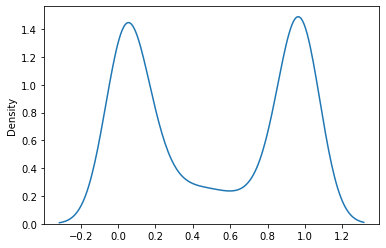

In [12]:
sns.kdeplot(X_PredNeuroP)